# Analysis of recent data
We graph the latest data, and compare to the first wave

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import utilities as u

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['figure.autolayout'] = True

def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = pd.read_csv("../trends/data-by-day.csv")
dat.rename(columns={"CASE_COUNT": "NEW_COVID_CASE_COUNT",
                   "date_of_interest" :"DATE_OF_INTEREST"},
           inplace=True)
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()
dat["Hospitalized/day, 7 day avg"] = dat["HOSPITALIZED_COUNT"].rolling(window="7D").mean()
dat["Deaths/day, 7 day avg"] = dat["DEATH_COUNT"].rolling(window="7D").mean()

## Since end of first peak

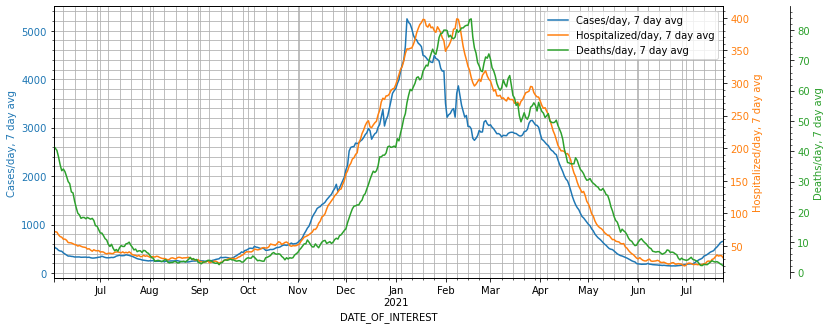

In [5]:
start = "2020-06-01"
period = dat[dat.index > start]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Since August

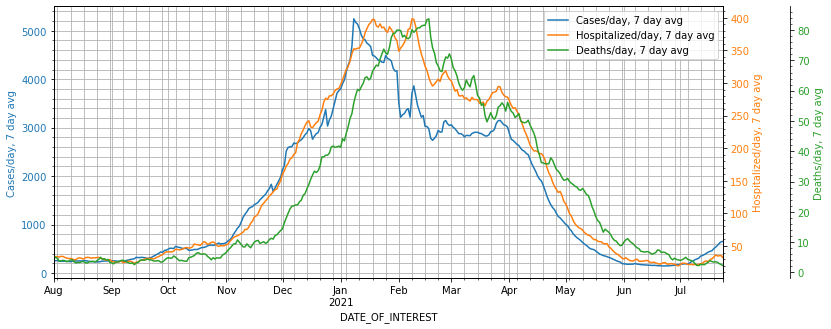

In [6]:
start = "2020-08-01"
end = "2025-12-01"

period = dat[(dat.index >= start) & (dat.index <= end)]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

plt.savefig("twoMonthsToOctPeak.png", bbox_inches="tight")

## Since end of second peak
Starting towards end of second peak

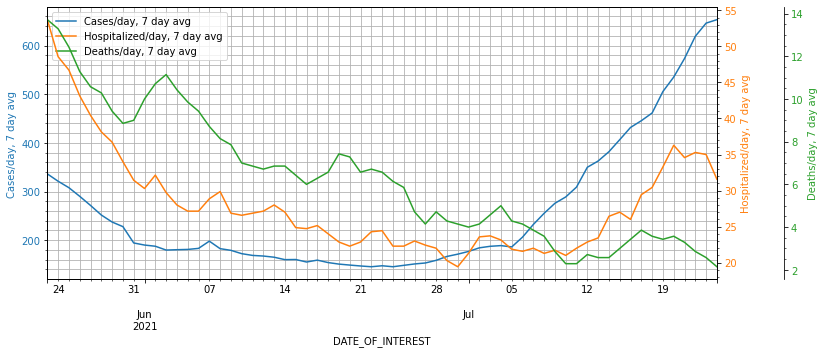

In [7]:
start = "2021-05-23"
end = "2025-12-01"

period = dat[(dat.index >= start) & (dat.index <= end)]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

plt.savefig("twoMonthsToOctPeak.png", bbox_inches="tight")

## Up to first peak

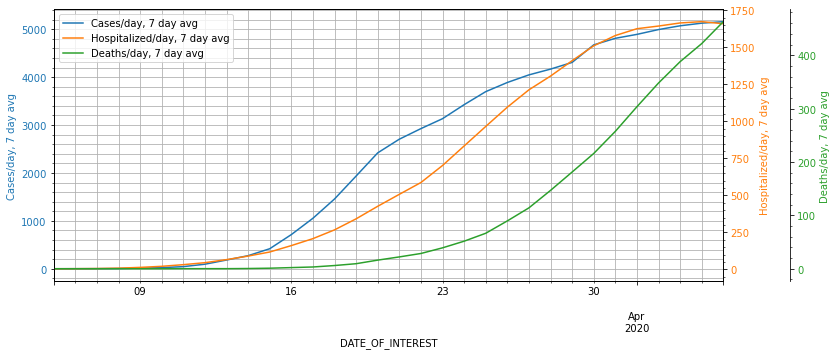

In [8]:
start = "2020-03-05"
end = "2020-04-05"

period = dat[(dat.index >= start) & (dat.index <= end)]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))
plt.grid(False, which="minor")


## First wave, rise & fall

The first wave looks much as expected.  We see a bell shaped rise & fall in cases/day, hospitalizations/day & deaths/day, with deaths/day lagging by several weeks.  We'd expect hospitalizations to also lag cases, and it does to some extent, but the case data appears to be a little noisy, and it also depends on how exactly cases are counted.

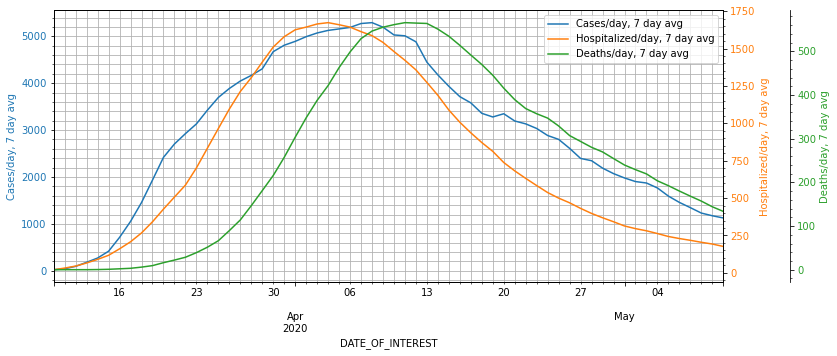

In [9]:
start = "2020-03-10"
end = "2020-05-10"

period = dat[(dat.index >= start) & (dat.index <= end)]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))
plt.grid(False, which="minor")

# Rates

In [10]:
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"]/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"]/dat["Cases/day, 7 day avg"]

## Full history

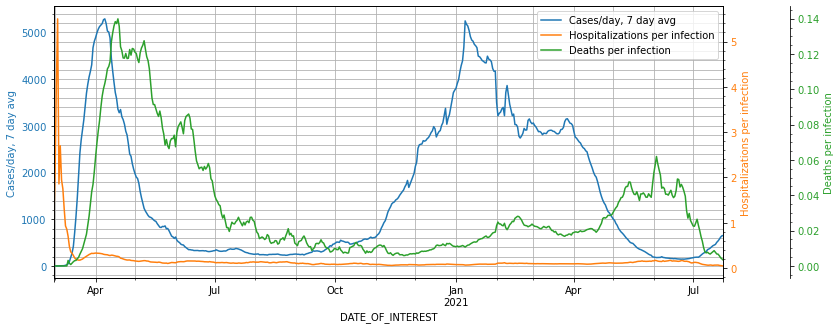

In [11]:
period = dat
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## First wave

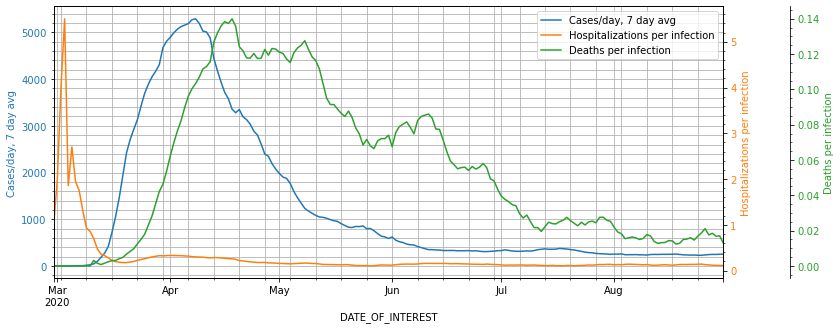

In [12]:
end = "2020-09-01"
period = dat[dat.index < end]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## Second wave

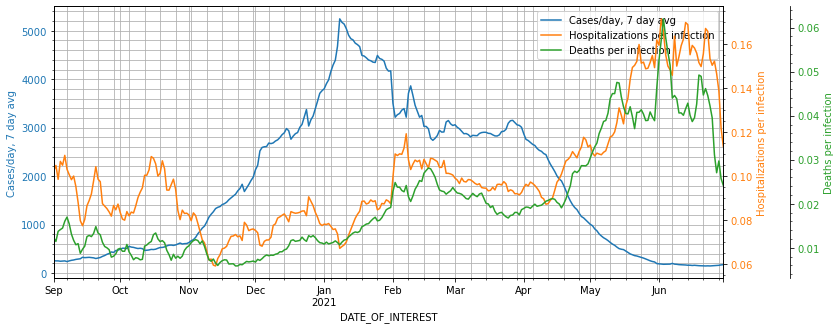

In [13]:
start = "2020-09-01"
end = "2021-07-01"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## Third wave

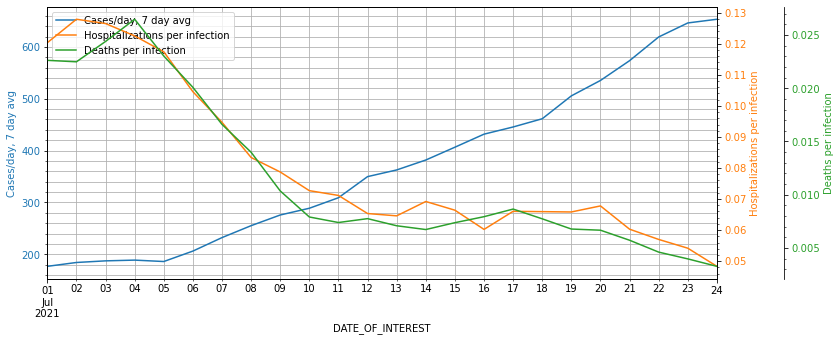

In [14]:
start = "2021-07-01"
period = dat[(dat.index >= start)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

# Accuracy of recent data
We graph all of the historical reports to analyze the missing data.  On a 7 day rolling average, we look at:
 - Cases/day
 - Hospitalizations/day
 - Deaths/day

When successive reports start all reporting the same number for a given date, that's when the counts for that date have stabilized and become reliable.  Before that, there's too much potential missing data to rely on the counts.

Generally speaking, it takes about 1-2 weeks before a count becomes reliable, although sometimes it takes as long as a month to get all of the data for a given date.

## Cases/day
Cases per day since the fall-off of the second wave (around 5/9/2021).  Note that NYC started phase 1 of reopening on June 8th.

In [15]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

In [16]:
start = "2021-05-16"

In [17]:
hdatpart = hdat[hdat["AS_OF"] >= start]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Cases/day, 7 day avg")
dppart = dp[dp.index >= start]

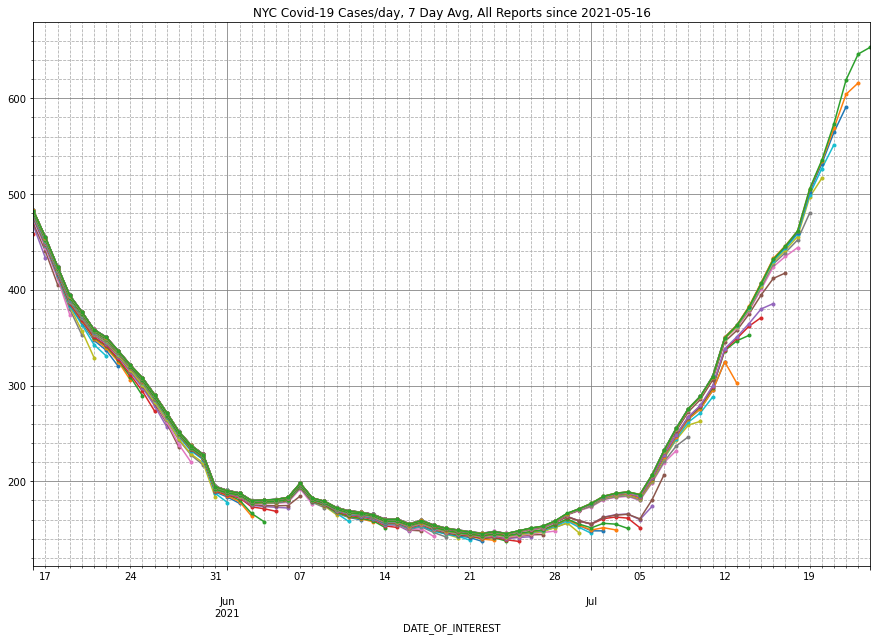

In [18]:
fig, ax = pltdflt((15,10))
dppart.plot(style=".-", ax=ax, legend=None)

plt.title(f"NYC Covid-19 Cases/day, 7 Day Avg, All Reports since {start}")
plt.savefig("casesPerDayHistoryNov2.png", bbox_inches="tight")

## Hospitalizations/day

In [19]:
hdatpart = hdat[hdat["AS_OF"] >= start]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Hospitalized/day, 7 day avg")
dppart = dp[dp.index >= start]

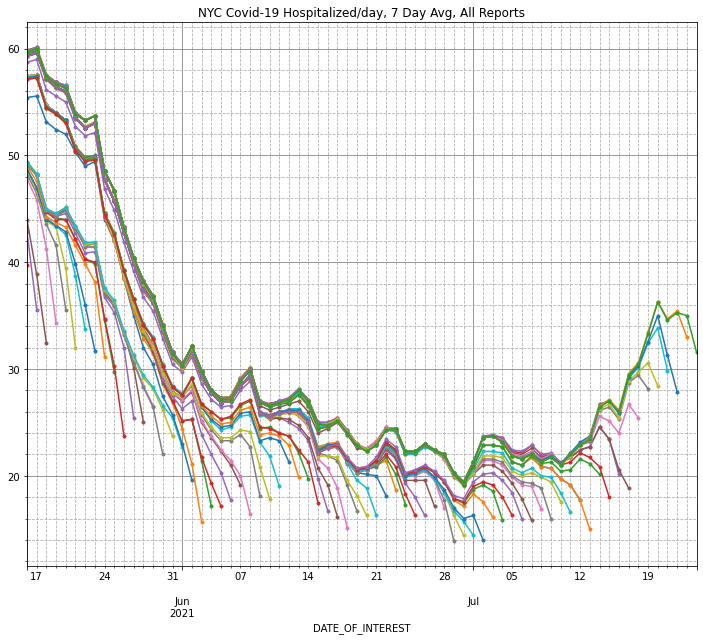

In [20]:
fig, ax = pltdflt()
dppart.plot(style=".-", ax=ax, legend=None)

plt.title("NYC Covid-19 Hospitalized/day, 7 Day Avg, All Reports")
plt.savefig("hospitalizedPerDayRecentHistory.png", bbox_inches="tight")

## Deaths/day

In [21]:
hdatpart = hdat[hdat["AS_OF"] >= start]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Deaths/day, 7 day avg")
dppart = dp[dp.index >= start]

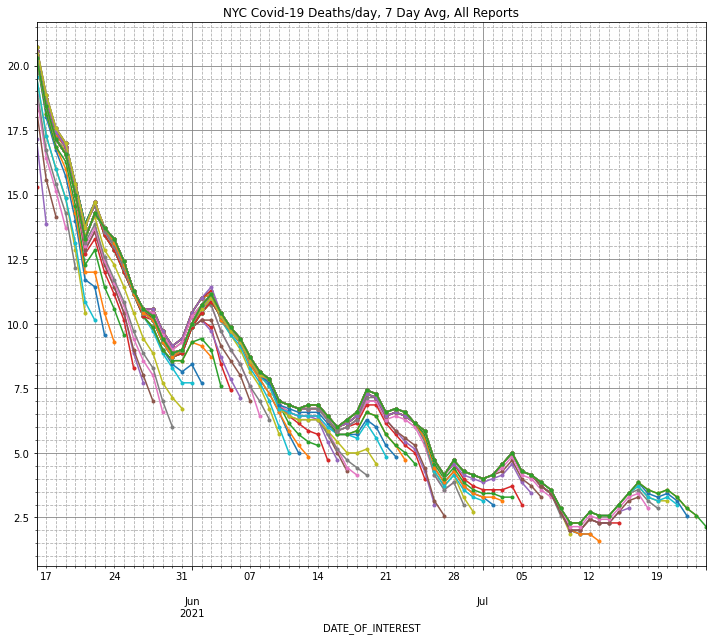

In [22]:
fig, ax = pltdflt()
dppart.plot(style=".-", ax=ax, legend=None)

plt.title("NYC Covid-19 Deaths/day, 7 Day Avg, All Reports")
plt.savefig("deathsPerDayHistory.png", bbox_inches="tight")